# IOE 373 Final Project

Authors: Eric Xu, Frederick Kusumo, Joseph Dib

In [1]:
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import numpy as np

In [2]:
df = pd.read_csv("AnalysisInfo.csv")
df.head()

,CustomerID,Age,ZIPCode,Family,Experience,EducUgrad,EducGrad,EducProf,Income,CCAvg,Mortgage,PersLoan,SecAccount,CDAccount,OnlineAccount,CreditCard
0,1.0,25.0,91107,4.0,1.0,1,0,0,49.0,1.6,0.0,0.0,1.0,0.0,0.0,0.0
1,2.0,45.0,90089,3.0,19.0,1,0,0,34.0,1.5,0.0,0.0,1.0,0.0,0.0,0.0
2,3.0,39.0,94720,1.0,15.0,1,0,0,11.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,35.0,94112,1.0,9.0,0,1,0,100.0,2.7,0.0,0.0,0.0,0.0,0.0,0.0
4,5.0,35.0,91330,4.0,8.0,0,1,0,45.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


<Axes: >

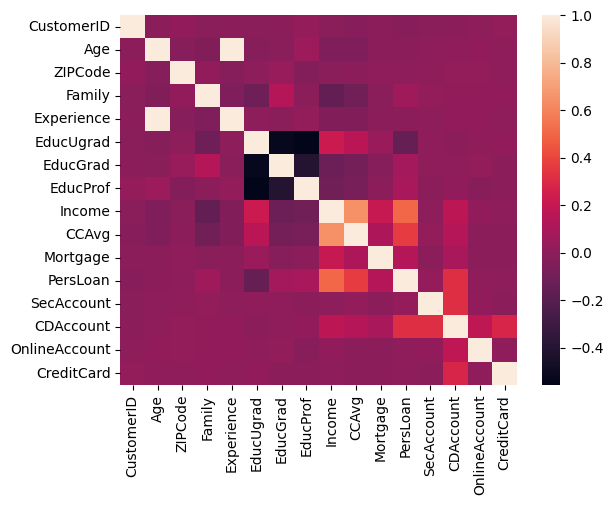

In [3]:
sns.heatmap(df.corr())

In [7]:
X = df.drop(columns=["PersLoan", 'CustomerID', 'ZIPCode'])
y = df["PersLoan"]

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

## Model

In [9]:
lm=LogisticRegression(max_iter=1000)
lm.fit(X_train, y_train)

#accuracy
accuracy = lm.score(X_train, y_train)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 95.44%


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [10]:
#actual coefficients

cols = X_train.columns
coef_lm=lm.coef_
pd.DataFrame(coef_lm, columns=cols).T.sort_values(by=0, ascending=False)

,0
CDAccount,3.115922
Family,0.652652
EducProf,0.212800
CCAvg,0.192729
EducGrad,0.188051
Experience,0.096157
Income,0.050755
Mortgage,0.000874
Age,-0.082807
OnlineAccount,-0.611556


In [11]:
odds=np.exp(lm.coef_)
pd.DataFrame(odds, columns=X_train.columns).T.sort_values(by=0, ascending=False)

,0
CDAccount,22.554211
Family,1.920627
EducProf,1.237137
CCAvg,1.212554
EducGrad,1.206895
Experience,1.100932
Income,1.052065
Mortgage,1.000874
Age,0.920529
OnlineAccount,0.542506


## Validating using Test Set

In [12]:
from sklearn.metrics import classification_report

predictions = lm.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98      2244
         1.0       0.88      0.66      0.75       256

    accuracy                           0.96      2500
   macro avg       0.92      0.82      0.87      2500
weighted avg       0.95      0.96      0.95      2500



In [13]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, predictions))

[[2221   23]
 [  87  169]]
